Will be working with the company Instacart's data. Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to Ubet Eats and Door Dash. There are five datasets I will be working with instacart_orders.csv, products.csv, order_products.csv, aisles.csv and departments.csv.The goal is to successfully process each dataset for analsysis and then answer some questions on the company at large such as the popularity of certain items and more. 

In [1]:
import numpy as pd
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep= ";")
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Description of the DataFrame instacart_orders.csv
Instacart_orders has 6 columns and each individual row corresponds to one order on the Instacart app. 
The columns listed are 
'order_id': ID number that uniquely identifies each order, 
'user_id': ID number that uniqely identifies each customer account, 
'order_number': the number of times this customer has placed an order, 
'order_dow': day of the week tha the order placed (0 being sunday),
'order_hour_of_day': hour of the day that the order was placed, 
'days_since_prior_order': number of days since this customer placed their previous order. 

I added the parameters sep= because the values in the DataFrame was split with a semi colon.

In [3]:
products_df = pd.read_csv('/datasets/products.csv', sep= ";")
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Description of the DataFrame prodcucts.csv 
products_df has 4 columns and each individual row corresponds to a unique product that customers can buy.
The columns listed are
'product_id': ID number that uniquely identifies each product. 
'product_name': name of the product. 
'aisle_id': ID number that uniquely identifies each grocery aisle category. 
'department_id': ID number that uniquely identifies each grocery department category

I added the parameters sep= because the values in the DataFrame was split with a semi colon.

In [4]:
aisles_df = pd.read_csv('/datasets/aisles.csv', sep= ";")
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


Description of the DataFrame aisles.csv
aisles_df has only 2 columns
The columns listed are
'aisle_id': ID number that uniquely identifies each grocery aisle category
'aisle': name of the aisle

I added the parameters sep= because the values in the DataFrame was split with a semi colon.

In [5]:
departments_df = pd.read_csv('/datasets/departments.csv', sep= ";")
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


Description of the DataFrame departments.csv
departments_df only 2 columns
The columns listed are
'department_id': ID number that uniquely identifie each grocery department category
'department': name of the department

I added the parameters sep= because the values in the DataFrame was split with a semi colon.

In [6]:
order_products = pd.read_csv('/datasets/order_products.csv', sep= ";")
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Description of the DataFrame departments.csv
order_products has 4 columns and each row corresponds to one item placed in an order
The columns listed are
'order_id': ID number that uniquely identifies each order
'product_id': ID number that uniquely identifies each product
'add_to_cart_order': the sequential order in which each item was placed in the cart
'reordered': 0 if the customer has never ordered this product before, 1 if they have

I added the parameters sep= because the values in the DataFrame was split with a semi colon.


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
# using value_counts() to check how many rows are the exact same looks like there are 5 rows, 15 when using the duplicated().sum() method
instacart_orders.value_counts()


order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1021560   53767    3             3          2                  9.0                       2
467134    63189    21            3          2                  2.0                       2
391768    57671    19            3          2                  10.0                      2
2282673   86751    49            3          2                  2.0                       2
408114    68324    4             3          2                  18.0                      2
                                                                                        ..
1141863   88987    2             1          11                 14.0                      1
1141854   125458   91            6          8                  2.0                       1
1141847   156072   4             2          21                 6.0                       1
1141845   153218   2             3          8                  6.0                       1
3421

In [8]:
# Check for all orders placed Wednesday at 2:00 AM

wed_2am_orders = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]

wed_2am_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [9]:
# Remove duplicate orders
# dropped each row that was the same
instacart_orders = instacart_orders.drop_duplicates() 


In [10]:
# Double check for duplicate rows
# Now I have 0 rows that are the same, everything is 1, as the method works from ascending order by default so the first 5 are one meaning there cannot be any that are greater than that
instacart_orders.value_counts()

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
4         178520   36            1          9                  7.0                       1
2278863   97255    4             5          18                 30.0                      1
2278985   93596    11            5          13                 23.0                      1
2278978   72281    21            3          16                 7.0                       1
2278962   188803   4             5          14                 0.0                       1
                                                                                        ..
1141845   153218   2             3          8                  6.0                       1
1141835   120105   16            4          10                 15.0                      1
1141834   92229    8             5          14                 26.0                      1
1141833   26712    27            3          13                 6.0                       1
3421

In [11]:
# Double check for duplicate order IDs only
instacart_orders['order_id'].duplicated().sum()

0

I have successfully removed duplicates from the instacart_orders DataFrame I created above

### `products` data frame

In [12]:
# Check for fully duplicate rows
products_df.value_counts()

product_id  product_name                                       aisle_id  department_id
1           Chocolate Sandwich Cookies                         61        19               1
33112       Krinkle Cut Carolina BBQ Potato Chips              107       19               1
33103       Fresh Ground Turkey- 85% Lean/15% Fat              35        12               1
33104       Organic Unsweetened Ketchup                        72        13               1
33105       French Vanilla Concentrated Liquid Coffee Creamer  53        16               1
                                                                                         ..
16570       Organic Fresh Carrot Chips                         123       4                1
16571       Unbleached Jumbo Baking Cups                       97        13               1
16572       Super Glue Gel Control                             87        17               1
16573       3 Cheese Ravioli                                   38        1           

In [13]:
# Check for just duplicate product IDs
products_df['product_id'].duplicated().sum()

0

In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df['product_name'] = products_df['product_name'].str.lower()
products_df['product_name'].duplicated().sum()


1361

In [15]:
# Check for duplicate product names that aren't missing
products_df.isna().sum()

non_missing_products = products_df[products_df['product_name'].notna()] # Created a DataFrame w/o missing values there were 1258 
product_name_counts = non_missing_products['product_name'].value_counts() # This checked the occurence of each value 
duplicate_products = product_name_counts[product_name_counts > 1] # This filtered out product names that only counted once

duplicate_products #Checked to see what names that are duplicated at least twice and not missing!


green tea with ginseng and honey                                        3
megaflora probiotic                                                     2
aged balsamic vinegar of modena                                         2
fresh scent dishwasher detergent with dawn                              2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
rigatoni with chicken & pesto                                           2
tomato juice from concentrate                                           2
apricot energy bar                                                      2
cream of celery condensed soup                                          2
original potato chips                                                   2
Name: product_name, Length: 103, dtype: int64

Checked the products_df DataFrame for duplicates and created a new DataFrame that doesn't include missing values called duplicated_products to check for non missing value duplicates. 

### `departments` data frame

In [16]:
departments_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [17]:
departments_df.head() # Just looking at the DataFrame

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
departments_df.value_counts() # checking for any duplicates 

department_id  department     
1              frozen             1
12             meat seafood       1
20             deli               1
19             snacks             1
18             babies             1
17             household          1
16             dairy eggs         1
15             canned goods       1
14             breakfast          1
13             pantry             1
11             personal care      1
2              other              1
10             bulk               1
9              dry goods pasta    1
8              pets               1
7              beverages          1
6              international      1
5              alcohol            1
4              produce            1
3              bakery             1
21             missing            1
dtype: int64

All I did was checking the data types and duplicates for the DataFrame departments_df, there were no duplicated departments

### `aisles` data frame

In [19]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [20]:
aisles_df.value_counts()

aisle_id  aisle                     
1         prepared soups salads         1
85        food storage                  1
99        canned fruit applesauce       1
98        juice nectars                 1
97        baking supplies decor         1
                                       ..
40        dog food care                 1
39        seafood counter               1
38        frozen meals                  1
37        ice cream ice                 1
134       specialty wines champagnes    1
Length: 134, dtype: int64

In [21]:
aisles_df['aisle'].str.lower()

aisles_df.value_counts()

aisle_id  aisle                     
1         prepared soups salads         1
85        food storage                  1
99        canned fruit applesauce       1
98        juice nectars                 1
97        baking supplies decor         1
                                       ..
40        dog food care                 1
39        seafood counter               1
38        frozen meals                  1
37        ice cream ice                 1
134       specialty wines champagnes    1
Length: 134, dtype: int64

In [22]:
aisles_df['aisle_id'].value_counts()

1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: aisle_id, Length: 134, dtype: int64

Checked aisles_df DataFrame for duplicates and datatypes. There were none


### `order_products` data frame

In [23]:
# Check for fullly duplicate rows
order_products.info(show_counts=True)
order_products.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_id  product_id  add_to_cart_order  reordered
4         10054       5.0                1            1
2277733   35233       5.0                1            1
2277734   15233       4.0                1            1
          11471       2.0                1            1
          6374        3.0                1            1
                                                     ..
1145037   26790       21.0               1            1
          27767       10.0               1            1
          32086       16.0               0            1
          33572       5.0                1            1
3421079   30136       1.0                0            1
Length: 4544171, dtype: int64

In [24]:
# Checked for duplicates, sneaky duplicates which what most likely what happened was by accident order_id's were input multiple times in the DataFrame
order_products['order_id'].duplicated().sum() 



4094961

In [25]:
duplicates_df = order_products['order_id'].value_counts()
duplicates_df

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64

In [26]:
order_products[order_products['order_id'] == 61355]

,order_id,product_id,add_to_cart_order,reordered
57981,61355,5322,NaN,0
149404,61355,39475,45.0,0
247893,61355,8594,NaN,0
269840,61355,14233,5.0,0
345399,61355,24010,51.0,0
...,...,...,...,...
4426514,61355,29270,15.0,0
4482168,61355,24964,33.0,0
4515077,61355,6760,27.0,0
4521208,61355,16262,62.0,0


In [27]:

order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [28]:
duplicates_count = order_products.duplicated(subset=['order_id', 'product_id']).sum()
duplicates_count

0

Checked for duplicates in orders_products DataFrame.

## Find and remove missing values


### `products` data frame

In [29]:
products_df

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [30]:
# Are all of the missing product names associated with aisle ID 100?
# Creating a variable that only icludes a DataFrame that has 'NaN' values in column 'product_name'
missing_product_names = products_df[pd.isna(products_df['product_name'])]
# Telling python using the all() method and .eq method whether all of the missing product names correspond to 'aisle id' 100
are_all_aisle_100 = missing_product_names['aisle_id'].eq(100).all()

are_all_aisle_100

True

In [31]:
# Are all of the missing product names associated with department ID 21?
are_all_department_21 = missing_product_names['department_id'].eq(21).all()
are_all_department_21

True

In [32]:
# What is this ailse and department?

departments_df
aisles_df
aisles_df[aisles_df['aisle_id'].isin([100])]


,aisle_id,aisle
99,100,missing


In [33]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [34]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [35]:
products_df['product_name'].nunique()

48333

Filled in the misisng values for product_name column which was the only column with misisng values. The DataFrame didn't have the names of certain products that were sold. I also figured out that all of the missing values were in aisles 100 and department id 21 which in the other DataFrames I looked at it it shows they are part of the missing category in departments and the same with aisles . Suggesting there is a problem with that department where people are not submitting the names of products.

### `orders` data frame

In [36]:
# used the isin() method to just see the DataFrame and also just see how many order_numbers where a user has only purchased one item
filtered_orders = instacart_orders[instacart_orders['order_number'].isin([1])]

filtered_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [37]:
# Are there any missing values where it's not a customer's first order?
non_first_orders = instacart_orders[instacart_orders['order_number'] != 1]

non_first_orders.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Checked for missing values where it's not a customers first order and there are none in days_since_prior_order or any other column

### `order_products` data frame

In [38]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [39]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [40]:
# What are the min and max values in this column?

order_products.min() 


order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

In [41]:
order_products.max()

order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64

In [42]:
order_products[pd.isna(order_products['add_to_cart_order'])]


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [43]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_id_w_mv = order_products.loc[pd.isna(order_products['add_to_cart_order']), ['order_id', 'product_id']]
order_id_w_mv

,order_id,product_id
737,2449164,5068
9926,1968313,43867
14394,2926893,11688
16418,1717990,4142
30114,1959075,42828
...,...,...
4505662,1800005,7411
4511400,1633337,260
4517562,404157,9517
4534112,1673227,17835


In [44]:
# Do all orders with missing values have more than 64 products?
# I grouped the missing value DataFrame/Variable and counted how many order_id's there were 
(order_id_w_mv.groupby('order_id').count() >= 64).all()




product_id    False
dtype: bool

In [45]:
order_counts = order_id_w_mv.groupby('order_id').size()

# Sample
random_order_count = order_counts.sample(5, random_state= 429)

random_order_count

order_id
2470674     7
1961723     9
388234      6
1220886     8
404157     12
dtype: int64

In [46]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Printed out the min and max values of order_products df. Created a DataFrame that hadat least one missing value in it for order_id's and created a code that counts the requency of unique order_id's there are to tell me how many rows there are of each order_id. I also replaced all my missing values with 999 and converted the column into an integer data type.  

Hi understood I was just following instrcutions though it said to replace all misisng values with 999 and convert to integer type thats what I did. Next time I wil replace it with empty strings. 

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [47]:
instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [48]:
instacart_orders['order_dow'].between(0, 6).all() 

True

In [49]:
instacart_orders['order_hour_of_day'].between(0, 23).all()

True

### [A2] What time of day do people shop for groceries?

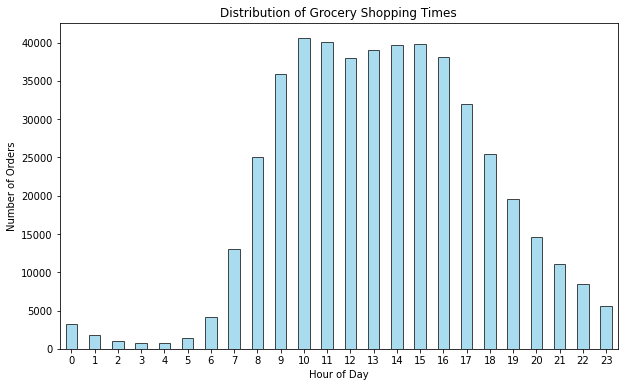

In [50]:
hourly_orders = instacart_orders.groupby('order_hour_of_day').size()


hourly_orders.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black', alpha=0.7,
       title='Distribution of Grocery Shopping Times', xlabel='Hour of Day', ylabel='Number of Orders')


# Setting the rotation for the x-ticks
plt.xticks(rotation=0)

# Show the plot
plt.show()

See above for the distribution of Grocery Shopping Times, the most common times to shop are from 10 am to 2 pm

### [A3] What day of the week do people shop for groceries?

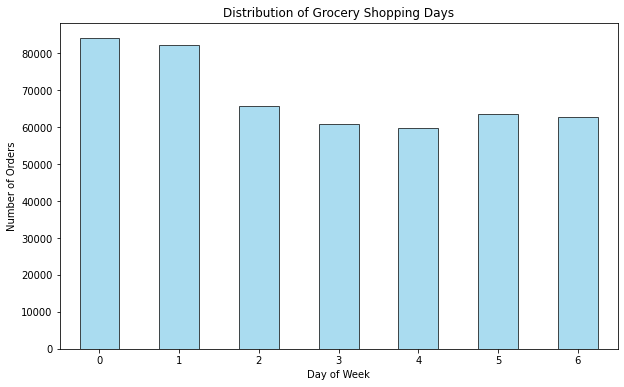

In [51]:
weekly_orders = instacart_orders.groupby('order_dow').size()

weekly_orders.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black', alpha=0.7,
       title='Distribution of Grocery Shopping Days', xlabel='Day of Week', ylabel='Number of Orders')


# Setting the rotation for the x-ticks
plt.xticks(rotation=0)

# Show the plot
plt.show()

The day of week that most people shop for groeries is Sunday and Monday

### [A4] How long do people wait until placing another order?

In [52]:

instacart_orders['days_since_prior_order'].median() # Used median here because there are big outliers as noted from checking its mean which was 11.4, big descrepancy 

7.0

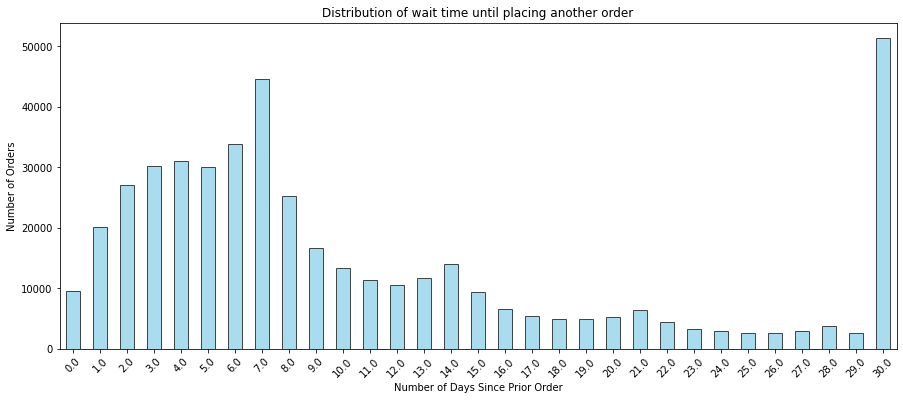

In [53]:
most_common_timeframe_to_reorder = instacart_orders.groupby('days_since_prior_order').size()

most_common_timeframe_to_reorder .plot(kind='bar', figsize=(15, 6), color='skyblue', edgecolor='black', alpha=0.7,
       title='Distribution of wait time until placing another order', xlabel='Number of Days Since Prior Order', ylabel='Number of Orders')


# Setting the rotation for the x-ticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

Majority of people wait 7 days to reorder an item or 30 days to reorder an item. There isn't an explanation to why 30 is the most popular number of days where a customer reorders the item other than the fact that the values in this column max out at 30 suggesting that any number of days over 30 was just bunched into one value 30.

People shop normally in the afternoon, on a Wednesday and normally place another order after 7 days of their previous one 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [54]:
instacart_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


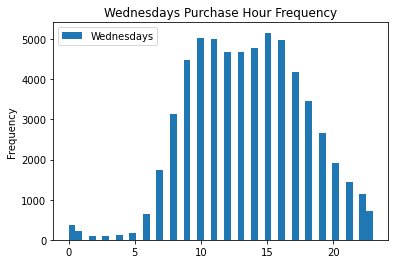

In [55]:
instacart_orders[instacart_orders['order_dow'] == 3.0]['order_hour_of_day'].plot(kind='hist', x='hours', title='Wednesdays Purchase Hour Frequency', bins=45)               

plt.legend(['Wednesdays'])
plt.show()

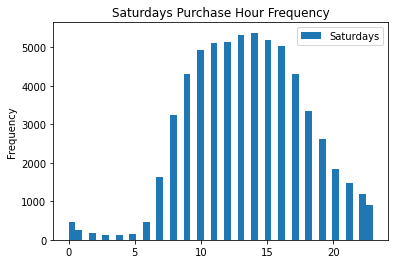

In [56]:
instacart_orders[instacart_orders['order_dow'] == 6.0]['order_hour_of_day'].plot(kind='hist', title= 'Saturdays Purchase Hour Frequency', bins = 45)
plt.legend(['Saturdays'])
plt.show()

It looks like they are quite similar, however it seems that Wednesdays most frequent purchase hour is at the 15th hour or around 3PM and on Saturday the most frequent purchase hour is slightly before that at around the 14th hour or 2 PM. Mid day is the most popular time to order for both days however the more people tend to order on Saturdays. 

### [B2] What's the distribution for the number of orders per customer?

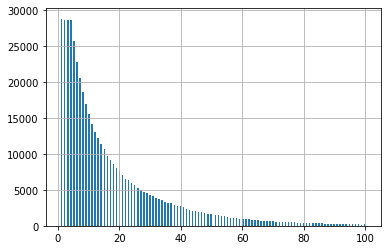

In [57]:
instacart_orders['order_number'].hist(bins=200)
plt.show()
#instacart_orders['order_number'].plot(kind='hist', title= 'Number of Orders Per Customer/User', bins = 30)
#plt.xlabel('Total Number of Orders')

Most customer have pruchased below 10 items, around 30,000 customers have purchased below 5 items. At 20 items only around 7.5 thousand customers have bought above that. And as the purchase orders increase per person the frequency of people who buy that amount decreases

### [B3] What are the top 20 popular products (display their id and name)?

In [58]:
consolidated_df = order_products.groupby('product_id').size().reset_index(name='count').sort_values(by=['count'], ascending=False).head(20)

consolidated_df

,product_id,count
22808,24852,66050
12025,13176,53297
19370,21137,37039
20077,21903,33971
43271,47209,29773
43788,47766,24689
43663,47626,21495
15364,16797,20018
24047,26209,19690
25556,27845,19600


In [59]:



merge_products = pd.merge(consolidated_df, products_df, on='product_id')
merge_products


,product_id,count,product_name,aisle_id,department_id
0,24852,66050,banana,24,4
1,13176,53297,bag of organic bananas,24,4
2,21137,37039,organic strawberries,24,4
3,21903,33971,organic baby spinach,123,4
4,47209,29773,organic hass avocado,24,4
5,47766,24689,organic avocado,24,4
6,47626,21495,large lemon,24,4
7,16797,20018,strawberries,24,4
8,26209,19690,limes,24,4
9,27845,19600,organic whole milk,84,16


The most bought items from greatest to least for the top 20 most purchased items is above in the count column. With the number with the most bought items are bananas.


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [60]:
order_products['order_id'].duplicated().sum()

4094961

In [61]:
# What I have done here is use the groupby() with the column I want to count. And I counted each indivual values frequency using the size() method on that column. Then I reseted the index to recreate the DataFrame with a new column name. 
items_per_order = order_products.groupby('order_id').size().reset_index(name= 'items per order')

items_per_order


items_per_order.sort_values(by='items per order').tail(10)

,order_id,items per order
34723,264710,91
236764,1800005,92
385157,2926893,92
227629,1730767,95
13574,102236,95
257945,1959075,98
22701,171934,104
281303,2136777,108
435088,3308010,115
8201,61355,127


In [62]:
items_per_order['items per order'].mean()

10.098983215049127

In [63]:
items_per_order['items per order'].median()

8.0

I used the order_products DF instead of the instacart_orders DF because the order_products has each order id as well as each individual product_id hence why there are so many duplicate order id's because it lists the same order each row regardless of how many products an order has. So say a someone ordered 10 products at once and the order ID was 5, the order ID '5' would be in the 'order_id' column five times because there were five seperate products bought in that order. So I counted the number of times each unique ID occured, which would quantify how many products there were for each order.

I then used the mean() method and the median() to discover that the average amount of products that people buy in an order is about 10 and the most common number of items people by is 8. WIth the most products in one order bought was 127 and the least obviously is 1 product in an order. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [64]:
reordered = order_products[order_products['reordered'] == 1]
reordered #I filtered out the DataFrane to only include items that were reordered

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [65]:
popular_reorders = reordered.groupby('product_id').size().reset_index(name ='Number of Reorders Per Product')
# I created a new DataFrame from our filtered one that adds a column that counts how many times a 'product_id' comes up individually, which gives us the number of times an item was reordered using the size() method. I also named the new column. 

In [66]:
popular_reorders

,product_id,Number of Reorders Per Product
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6
...,...,...
36223,49690,4
36224,49691,31
36225,49692,5
36226,49693,11


In [67]:
popular_reorders_merged = pd.merge(popular_reorders, products_df, on= 'product_id')
# Here I merged the new DataFrame with our products_df DataFrame to include the names of the products on= their similar column 'product_id'

In [68]:
popular_reorders_merged 

,product_id,Number of Reorders Per Product,product_name,aisle_id,department_id
0,1,158,chocolate sandwich cookies,61,19
1,3,31,robust golden unsweetened oolong tea,94,7
2,4,25,smart ones classic favorites mini rigatoni wit...,38,1
3,7,1,pure coconut water with orange,98,7
4,8,6,cut russet potatoes steam n' mash,116,1
...,...,...,...,...,...
36223,49690,4,high performance energy drink,64,7
36224,49691,31,original pancake & waffle mix,130,14
36225,49692,5,organic instant oatmeal light maple brown sugar,130,14
36226,49693,11,spring water body wash,127,11


In [69]:
popular_reorders = popular_reorders_merged.sort_values(by= 'Number of Reorders Per Product', ascending= False).head(20) 
popular_reorders
#Here I finally sorted the  DataFrame least to greatest by its Number of Reorders per product and printed out the top 20 most reordered products

,product_id,Number of Reorders Per Product,product_name,aisle_id,department_id
18104,24852,55763,banana,24,4
9528,13176,44450,bag of organic bananas,24,4
15368,21137,28639,organic strawberries,24,4
15936,21903,26233,organic baby spinach,123,4
34407,47209,23629,organic hass avocado,24,4
34828,47766,18743,organic avocado,24,4
20285,27845,16251,organic whole milk,84,16
34725,47626,15044,large lemon,24,4
20375,27966,14748,organic raspberries,123,4
12193,16797,13945,strawberries,24,4


I filterered out the DataFrame into a different variable that included only reordered items and the count of each product_id that was reordered as well as I merged the DataFrame based on the prodct_id with products_df to include the names of the products. Then I sorted out the DataFrame and from greatest to least. The most popular reordered items bananas with 55,763 reorders by customers and the second most popular reordered item ironically is a bag of organic bananas. Fruit it seems are the most frequently reordered items as it covers 4 of the 5 most frequently reordered items.

### [C3] For each product, what proportion of its orders are reorders?

In [70]:
not_reordered_products = order_products[order_products['reordered'] == 0]
not_reordered_products
# filtered a DataFrame that only includes non_reordered_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
11,44064,22963,28,0
13,2475670,48520,3,0
18,89640,46692,7,0
21,2905625,26209,2,0
...,...,...,...,...
4544995,635380,28849,11,0
4544997,2300092,10017,1,0
4545001,2179020,10902,23,0
4545003,1219554,21914,9,0


In [71]:
non_reordered_count_products = not_reordered_products.groupby('product_id').size().reset_index(name= 'Number of Non Reorders per Item')
non_reordered_count_products
#Counted the number of times each product was not reordered and made a new df

,product_id,Number of Non Reorders per Item
0,1,122
1,2,11
2,3,11
3,4,24
4,7,1
...,...,...
43759,49690,1
43760,49691,41
43761,49692,7
43762,49693,14


In [72]:
reordered_products = order_products[order_products['reordered'] == 1]
reordered_products
# filtered a new dataframe that only includes reordered products

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [73]:
reordered_count_products = reordered_products.groupby('product_id').size().reset_index(name= 'Number of Reorders per Item')
reordered_count_products
# Counted the number of times each product was reordered and made a new dataframe

,product_id,Number of Reorders per Item
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6
...,...,...
36223,49690,4
36224,49691,31
36225,49692,5
36226,49693,11


In [74]:
new_df_merged = pd.merge(non_reordered_count_products, reordered_count_products, on= 'product_id')
new_df_merged
# Merged both the reordered prodcuct number df and the non reordered product list 

,product_id,Number of Non Reorders per Item,Number of Reorders per Item
0,1,122,158
1,3,11,31
2,4,24,25
3,7,1,1
4,8,13,6
...,...,...,...
34414,49690,1,4
34415,49691,41,31
34416,49692,7,5
34417,49693,14,11


In [75]:
new_df_merged_w_names = pd.merge(new_df_merged, products_df, on= 'product_id')
# merged the previous df with the products_df DataFrame on 'product_id to include the names of each product 

In [76]:
new_df_merged_w_names['total_orders_per_item'] = new_df_merged_w_names['Number of Reorders per Item'] + new_df_merged_w_names['Number of Non Reorders per Item']
new_df_merged_w_names
# Added a new column to get the total number of orders per product regardless if they were reorders or not

,product_id,Number of Non Reorders per Item,Number of Reorders per Item,product_name,aisle_id,department_id,total_orders_per_item
0,1,122,158,chocolate sandwich cookies,61,19,280
1,3,11,31,robust golden unsweetened oolong tea,94,7,42
2,4,24,25,smart ones classic favorites mini rigatoni wit...,38,1,49
3,7,1,1,pure coconut water with orange,98,7,2
4,8,13,6,cut russet potatoes steam n' mash,116,1,19
...,...,...,...,...,...,...,...
34414,49690,1,4,high performance energy drink,64,7,5
34415,49691,41,31,original pancake & waffle mix,130,14,72
34416,49692,7,5,organic instant oatmeal light maple brown sugar,130,14,12
34417,49693,14,11,spring water body wash,127,11,25


In [77]:
new_df_merged_w_names['Porportion of Orders that are Reordered'] = new_df_merged_w_names['Number of Reorders per Item'] /  new_df_merged_w_names['total_orders_per_item']
new_df_merged_w_names
# Added another column that takes the porportion of orders that were reorders by dividing the number of reorders from each product by the total number of orders

,product_id,Number of Non Reorders per Item,Number of Reorders per Item,product_name,aisle_id,department_id,total_orders_per_item,Porportion of Orders that are Reordered
0,1,122,158,chocolate sandwich cookies,61,19,280,0.564286
1,3,11,31,robust golden unsweetened oolong tea,94,7,42,0.738095
2,4,24,25,smart ones classic favorites mini rigatoni wit...,38,1,49,0.510204
3,7,1,1,pure coconut water with orange,98,7,2,0.500000
4,8,13,6,cut russet potatoes steam n' mash,116,1,19,0.315789
...,...,...,...,...,...,...,...,...
34414,49690,1,4,high performance energy drink,64,7,5,0.800000
34415,49691,41,31,original pancake & waffle mix,130,14,72,0.430556
34416,49692,7,5,organic instant oatmeal light maple brown sugar,130,14,12,0.416667
34417,49693,14,11,spring water body wash,127,11,25,0.440000


In [78]:
filtered_df = new_df_merged_w_names.drop(['aisle_id', 'department_id'], axis=1)
filtered_df = filtered_df.sort_values(by='Porportion of Orders that are Reordered', ascending=False)
filtered_df

# Here to make it more neat I deleted the irrelevant columns and sorted the DataFrame from Greatest to Least

,product_id,Number of Non Reorders per Item,Number of Reorders per Item,product_name,total_orders_per_item,Porportion of Orders that are Reordered
7048,10236,1,20,fragrance free clay with natural odor eliminat...,21,0.952381
3780,5470,1,18,tequila reposado,19,0.947368
6121,8867,1,17,artisan multigrain bread,18,0.944444
14352,20783,1,17,super detox acai noni goji,18,0.944444
18732,27041,1,15,mushroom stems & pieces,16,0.937500
...,...,...,...,...,...,...
32810,47385,47,1,ground mustard,48,0.020833
25724,37120,107,2,dill weed,109,0.018349
10124,14688,54,1,bamboo skewers,55,0.018182
19912,28741,54,1,organic ground cloves,55,0.018182


Here I have created a DataFrame that has the porportion of orders that were reordered for each individual product. Fragrance Free Clay with Natural Odor had the highest rate of being reordered, 95% of the time. Second was tequila reposado where the product was reordered 94% of the time. It also should be noted that these two products were not ordered very many times.

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [79]:
items_put_in_first = order_products[order_products['add_to_cart_order'] == 1]
# filters a new DataFrame where it only includes items that were put in the cart first

In [80]:
number_of_each_item = items_put_in_first.groupby('product_id').size().reset_index(name= 'Number of First Cart Items')
# I used the same groupby() and size() to create a count of how many product_id's there were that were put in the cart first

In [81]:
# Here I merged the DataFrame with products_df to include the names of each product and sorted it greatest to least and printed out only the top 20
number_items_in_first_merged = pd.merge(number_of_each_item, products_df, on= 'product_id').sort_values(by='Number of First Cart Items', ascending=False).head(20)

In [82]:
number_items_in_first_merged

,product_id,Number of First Cart Items,product_name,aisle_id,department_id
13414,24852,15562,banana,24,4
7127,13176,11026,bag of organic bananas,24,4
15028,27845,4363,organic whole milk,84,16
11384,21137,3946,organic strawberries,24,4
25439,47209,3390,organic hass avocado,24,4
11786,21903,3336,organic baby spinach,123,4
25732,47766,3044,organic avocado,24,4
10622,19660,2336,spring water,115,7
9050,16797,2308,strawberries,24,4
15102,27966,2024,organic raspberries,123,4


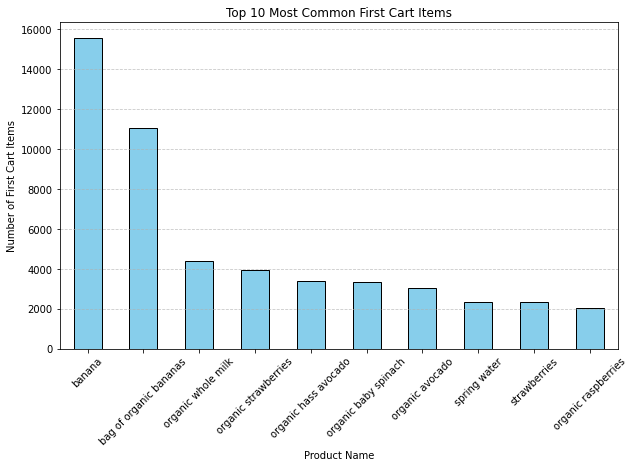

In [83]:
sorted_df = number_items_in_first_merged.sort_values(by='Number of First Cart Items', ascending=False)
# i used sort instead of groupby() here because there is no need to count the number of times an item was put in the cart first because I had already done that in my DataFrame
# Plotting the top 10 most common first cart items
(sorted_df.head(10)
 .plot(kind='bar', x='product_name', y='Number of First Cart Items', figsize=(10, 6), legend=False,
       title='Top 10 Most Common First Cart Items', xlabel='Product Name', ylabel='Number of First Cart Items', color='skyblue', edgecolor='black')
)

# Set the rotation for the x-ticks since there's no parameter in plot() for this
plt.xticks(rotation=45)  # Rotated the product names for better readability

#Added a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

I used a bar graph here and only included the top 10 because I thought it was better visually. If you want to see the top 20 most common items put in customers carts first you can look at the DataFrame above it. The most common item put first in the cart was bananas with a count of 15562. As well as ironically organic bananas were second.	

Overall I filtered out each DataFrame from analysis as well as performed analysis for many questions labeled in the table of contents. The questions I answered were 2.5 - 2.8, B2 and B3, C1, C2, C3 and C5. The only question I did not answer was C4. I also have descriptions for each answer in a markdown below the data analysis. 